In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.linear_model import LogisticRegression,LinearRegression
# from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [24]:
project = pd.read_csv('predict_consume_최종.csv', encoding='euc-kr')
project

,년도,귤도매가격,귤소매가격,오렌지도매가격,오렌지소매가격,생산자물가지수(감귤),소비자물가지수(감귤),1인당 가처분소득,1인당 연간소비량(kg),오렌지가격_1kg,오렌지가공매출_백만원,오렌지가공량_ton,감귤가격_1kg,감귤가공매출_백만원,인구수,감귤가공량_ton,도외출하량
0,1998,10884.666670,11929.333330,21830.00000,45000.0,95.98,80.644,57194.3727,NaN,2310,NaN,13836.0,1326,NaN,46286503,5012,500000
1,1999,6206.000000,11933.333330,30530.00000,93240.0,113.29,102.156,58382.7420,NaN,3202,NaN,15070.0,1512,NaN,46616677,33142,567041
2,2000,7417.333333,11800.000000,14240.00000,52580.0,58.74,55.410,61964.6448,11.9,1538,188000.0,11375.0,936,NaN,47008111,27468,430617
3,2001,6356.000000,11066.666670,17780.00000,51290.0,90.97,79.033,68150.2896,NaN,1898,NaN,10869.0,1194,NaN,47370164,47445,527326
4,2002,5312.000000,8866.666667,22410.00000,63440.0,84.83,84.325,75338.7816,13.3,2390,NaN,8229.0,1099,NaN,47644736,112359,531081
5,2003,9075.000000,26300.000000,17700.00000,56280.0,57.45,63.620,82105.3168,13.0,1904,NaN,19712.0,900,NaN,47892330,120333,477523
6,2004,12609.000000,27000.000000,18720.00000,58280.0,96.77,85.198,90825.8304,12.0,2006,NaN,24065.0,1337,NaN,48082519,100517,415338
7,2005,12133.000000,16500.000000,16700.00000,63520.0,143.35,106.735,95684.7528,13.1,1814,NaN,25366.0,1795,NaN,48184561,125343,491260
8,2006,13026.000000,31800.000000,18650.00000,63380.0,100.05,84.334,99341.6424,12.7,1998,NaN,26547.0,1426,NaN,48438292,109496,450087
9,2007,7101.000000,13100.000000,23090.00000,70610.0,157.50,109.137,107368.2552,16.0,2445,NaN,24101.0,1582,NaN,48683638,138782,513746


In [25]:
#project.iloc[:,14]
x_1 = project.drop(labels='감귤가공량_ton',axis=1)

In [26]:

x = x_1.iloc[:,9:15]
y = project.iloc[:,15]

In [27]:
x = x.fillna(np.mean(x))

In [53]:
x

,오렌지가격_1kg,오렌지가공매출_백만원,오렌지가공량_ton,감귤가격_1kg,감귤가공매출_백만원,인구수
0,2310,178410.7,13836.000000,1326,74175.111111,46286503
1,3202,178410.7,15070.000000,1512,74175.111111,46616677
2,1538,188000.0,11375.000000,936,74175.111111,47008111
3,1898,178410.7,10869.000000,1194,74175.111111,47370164
4,2390,178410.7,8229.000000,1099,74175.111111,47644736
5,1904,178410.7,19712.000000,900,74175.111111,47892330
6,2006,178410.7,24065.000000,1337,74175.111111,48082519
7,1814,178410.7,25366.000000,1795,74175.111111,48184561
8,1998,178410.7,26547.000000,1426,74175.111111,48438292
9,2445,178410.7,24101.000000,1582,74175.111111,48683638


In [29]:
y

0       5012
1      33142
2      27468
3      47445
4     112359
5     120333
6     100517
7     125343
8     109496
9     138782
10     88664
11    123551
12     81117
13    102899
14     55814
15     92834
16     81053
17     84679
18     56372
19     72460
20     63402
21     60425
Name: 감귤가공량_ton, dtype: int64

In [8]:
pro2 = project.fillna(np.mean(project))

In [261]:
#model.fit(pro2_x,pro2_y)
logreg= LogisticRegression(solver='lbfgs',max_iter=20).fit(x,y)

print('정확도:%.2f'%(logreg.score(x,y)*100),"%")

정확도:31.82 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of ite

In [309]:
pro2.head()
pro2_x = pro2.iloc[:,:15]
pro2_y = pro2.iloc[:,15]

In [16]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x,y)

# y_pred = model.predict(x_test)

# print('RandomForestClassifier test 정확도:%.2f'%(model_score(pro2_x,pro2_y)*100),"%")


features = pd.Series(model.feature_importances_,
                    index=x.columns).sort_values(ascending=False)
print(features)

인구수            0.206221
오렌지가격_1kg      0.199291
오렌지가공량_ton     0.197154
감귤가격_1kg       0.191861
오렌지가공매출_백만원    0.107209
감귤가공매출_백만원     0.098264
dtype: float64


In [263]:
model = RandomForestRegressor(n_estimators=100, bootstrap=True, criterion='mse', max_depth=None, max_leaf_nodes=None, min_samples_split=2, min_samples_leaf=1, max_features='auto')
model.fit(x, y)

print('RandomForest test 정확도:%.2f'%(model.score(x, y)*100),"%")

RandomForest test 정확도:91.25 %


In [335]:
# MLPRegressor + StandardScaler
from sklearn.metrics import r2_score

mlp = MLPRegressor(hidden_layer_sizes=[48, 4], max_iter=5000, alpha=0.005, random_state=42)

mlp.fit(x,y)



MLPRegressor(activation='relu', alpha=0.005, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=[48, 4], learning_rate='constant',
             learning_rate_init=0.001, max_iter=5000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=42, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [338]:
models = [
    LinearRegression(), 
    MLPRegressor(hidden_layer_sizes=[512, 4], alpha=0.005, random_state=42),
    MLPRegressor(hidden_layer_sizes=[48, 4], max_iter=5000, alpha=0.005, random_state=42), 
    MLPRegressor(hidden_layer_sizes=[512, 4], max_iter=5000, alpha=0.005, random_state=42), 
    MLPRegressor(hidden_layer_sizes=[1024, 4], max_iter=5000, alpha=0.005, random_state=42),
    MLPRegressor(hidden_layer_sizes=[1024, 512, 4], max_iter=5000, alpha=0.005, random_state=42),
]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size =0.7, test_size=0.3)

for m in models:
    m.fit(x_train, y_train)
    print(m.__class__)
    print(r2_score(y_train, m.predict(x_train)))
    print(r2_score(y_test, m.predict(x_test)))

plt.figure(figsize=(12, 6))

#plt.scatter(x, y, marker='^', s=50, alpha=0.7, label='y_true')
for i, m in enumerate(models):
#    plt.scatter(x, m.predict(x), marker='o', s=10, alpha=0.7, label='nn_{}'.format(i))
#plt.legend()
#plt.savefig('../../assets/images/markdown_img/180607_1614_nn_scatter.svg')
#plt.show()

SyntaxError: unexpected EOF while parsing (<ipython-input-338-43bffa1ff0af>, line 24)

In [54]:
# MinMaxScaler + LogisticRegression
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(x)

logreg= LogisticRegression(solver='lbfgs',max_iter=20).fit(scaled_data,y)

print('정확도:%.2f'%(logreg.score(scaled_data,y)*100),"%")

정확도:54.55 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [61]:
# Random
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(x)

randomF= RandomForestRegressor(n_estimators=100,max_depth =3,min_samples_leaf=1).fit(scaled_data,y)

print('정확도:%.2f'%(randomF.score(scaled_data,y)*100),"%")

정확도:89.53 %


In [62]:
from sklearn.preprocessing import StandardScaler
# z점수
from sklearn.linear_model import LogisticRegression,LinearRegression

from sklearn.preprocessing import scale, robust_scale, minmax_scale , maxabs_scale
scaler = scale(x)

#scaled_data = scale.fit(x)

logreg= LinearRegression().fit(scaler,y)

print("Logi.Regre Z점수 정확도:%.2f" %(logreg.score(scaler,y)*100),"%")
#
scaler = maxabs_scale(x)

#scaled_data = scale.fit(x)

logreg= LinearRegression().fit(scaler,y)

print('Logi.Regre maxabs점수 정확도:%.2f'%(logreg.score(scaler,y)*100),"%")
#
scaler = minmax_scale(x)

#scaled_data = scale.fit(x)

logreg= LinearRegression().fit(scaler,y)

print('Logi.Regre minmax점수 정확도:%.2f'%(logreg.score(scaler,y)*100),"%")
#
scaler = robust_scale(x)

#scaled_data = scale.fit(x)
LinearRegression()
logreg= LinearRegression().fit(scaler,y)

print('Logi.Regre robust점수 정확도:%.2f'%(logreg.score(scaler,y)*100),"%")

Logi.Regre Z점수 정확도:17.44 %
Logi.Regre maxabs점수 정확도:17.44 %
Logi.Regre minmax점수 정확도:17.44 %
Logi.Regre robust점수 정확도:17.44 %


In [66]:
scaler = scale(x)
logreg= LinearRegression().fit(scaler,y)

print("Logi.Regre Z점수 정확도:%.2f" %(logreg.score(scaler,y)*100),"%")

print(logreg.coef_,'\n\n\n', logreg.intercept_)


Logi.Regre Z점수 정확도:17.44 %
[ -5437.65279115    909.96952314  13875.50900338 -14802.58986005
   4569.95135626   5484.0695176 ] 


 81053.04545454546


In [69]:
X_train, X_test, y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state =123)

from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.preprocessing import scale, robust_scale, minmax_scale , maxabs_scale

scaler = scale(x)

RandomF= RandomForestRegressor(n_estimators = 45, random_state=42).fit(scaler,y)

print('RF/ Z_점수 정확도:%.2f'%(RandomF.score(scaler,y)*100),"%")
###########

RF/ Z_점수 정확도:90.51 %


In [381]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.5, random_state = 42)

In [389]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
x.shape

(17, 6)
(11,)
(17,)
(11,)


(22, 6)

In [93]:
x = x.astype('int64')

In [94]:
x.dtypes

오렌지가격_1kg      int64
오렌지가공매출_백만원    int64
오렌지가공량_ton     int64
감귤가격_1kg       int64
감귤가공매출_백만원     int64
인구수            int64
dtype: object

In [135]:
qqq = MinMaxScaler(y)

In [136]:
qqq

MinMaxScaler(copy=True,
             feature_range=0       5012
1      33142
2      27468
3      47445
4     112359
5     120333
6     100517
7     125343
8     109496
9     138782
10     88664
11    123551
12     81117
13    102899
14     55814
15     92834
16     81053
17     84679
18     56372
19     72460
20     63402
21     60425
Name: 감귤가공량_ton, dtype: int64)

In [113]:
from sklearn.preprocessing import StandardScaler
mmax = minmax_scale(y)

In [122]:
mmax

array([0.        , 0.21028631, 0.16787023, 0.31720864, 0.8024744 ,
       0.86208417, 0.71394932, 0.89953652, 0.78107199, 1.        ,
       0.625342  , 0.88614039, 0.56892427, 0.731756  , 0.37977125,
       0.65651491, 0.56844584, 0.59555207, 0.38394259, 0.50420872,
       0.43649548, 0.41424086])

In [121]:
scaler

array([[0.46394231, 0.43115862, 0.14290448, 0.23919147, 0.29156755,
        0.        ],
       [1.        , 0.43115862, 0.17435518, 0.34362718, 0.29156755,
        0.06088856],
       [0.        , 0.51587968, 0.08018147, 0.02021336, 0.29156755,
        0.13307429],
       [0.21634615, 0.43115862, 0.06728515, 0.1650758 , 0.29156755,
        0.19984177],
       [0.51201923, 0.43115862, 0.        , 0.11173498, 0.29156755,
        0.25047657],
       [0.21995192, 0.43115862, 0.2926649 , 0.        , 0.29156755,
        0.29613626],
       [0.28125   , 0.43115862, 0.40360893, 0.24536777, 0.29156755,
        0.33120969],
       [0.16586538, 0.43115862, 0.43676725, 0.50252667, 0.29156755,
        0.35002762],
       [0.27644231, 0.43115862, 0.46686716, 0.2953397 , 0.29156755,
        0.39681905],
       [0.54507212, 0.43115862, 0.40452646, 0.38293094, 0.29156755,
        0.44206418],
       [0.31730769, 0.43115862, 0.44413294, 0.19090399, 0.29156755,
        0.51049451],
       [0.78305288, 0

In [139]:
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.preprocessing import scale, robust_scale, minmax_scale , maxabs_scale
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

scaler = minmax_scale(x)


RandomF= RandomForestRegressor(n_estimators = 45, random_state=42).fit(scaler,mmax)
y_pred = RandomF.predict(scaler)

RMSE = mean_squared_error(mmax,y_pred)**0.5
MSE = mean_squared_error(mmax,y_pred)
MAPE = mean_absolute_error(mmax,y_pred)

print(RMSE,"\n",MSE,"\n",MAPE)

0.07786852003717695 
 0.006063506412780228 
 0.06609687918531457


In [311]:

# Random forest scale
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.preprocessing import scale, robust_scale, minmax_scale , maxabs_scale
scaler = scale(x)

RandomF= RandomForestRegressor(n_estimators = 45, random_state=42).fit(scaler,y)

print('RF/ Z_점수 정확도:%.2f'%(RandomF.score(scaler,y)*100),"%")
###########
scaler = robust_scale(x)

RandomF= RandomForestRegressor(n_estimators = 45, random_state=42).fit(scaler,y)

print('RF/ robust 정확도:%.2f'%(RandomF.score(scaler,y)*100),"%")
###########
scaler = minmax_scale(x)

RandomF= RandomForestRegressor(n_estimators = 45, random_state=42).fit(scaler,y)

print('RF/ minmax 정확도:%.2f'%(RandomF.score(scaler,y)*100),"%")
###########
scaler = maxabs_scale(x)

RandomF= RandomForestRegressor(n_estimators = 45, random_state=42).fit(scaler,y)

print('RF/ maxabs 정확도:%.2f'%(RandomF.score(scaler,y)*100),"%")
###########

RF/ Z_점수 정확도:90.79 %
RF/ robust 정확도:90.79 %
RF/ minmax 정확도:90.79 %
RF/ maxabs 정확도:90.79 %


In [342]:
import xgboost as xgb
from xgboost import XGBRegressor

In [289]:
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.svm import LinearSVR

In [290]:
models = {
    'SVM':LinearSVR(epsilon=1.5,random_state=42),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'KNeighborsRegressor': KNeighborsRegressor(n_jobs=-1),
    'LinearRegression': LinearRegression(n_jobs=-1),
    'RandomForestRegressor': RandomForestRegressor(n_estimators=100)
}

cv = KFold(n_splits=5, random_state=42)

for name, model in models.items():
    scores = cross_val_score(model, x, y, cv=cv)
    print('%s: %.2f%%'% (name, np.mean(scores)*100))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

SVM: -2984.51%
DecisionTreeRegressor: -594.37%
KNeighborsRegressor: -991.52%
LinearRegression: -6725.00%
RandomForestRegressor: -1176.54%


In [230]:
models = {
    'SVM':svm.SVC(gamma='scale'),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs', max_iter=2000),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100)
}

cv = KFold(n_splits=5, random_state=42)
y_pred = model.predict(X_test)

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=cv)
    print('%s: %.2f%%'% (name, np.mean(scores)*100))
    print('%s: %.2f'%(name,metrics.accuracy_score(y_pred, y_test)*100),"%")

SVM: 0.00%
SVM: 0.00 %
DecisionTreeClassifier: 0.00%
DecisionTreeClassifier: 0.00 %
KNeighborsClassifier: 0.00%
KNeighborsClassifier: 0.00 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-pa

LogisticRegression: 0.00%
LogisticRegression: 0.00 %
RandomForestClassifier: 0.00%
RandomForestClassifier: 0.00 %


In [24]:
model = svm.SVC(gamma='scale')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('SVM 정확도:%.2f'%(metrics.accuracy_score(y_pred, y_test)*100),"%")

SVM 정확도:0.00 %


In [33]:
project


,년도,귤도매가격,귤소매가격,오렌지도매가격,오렌지소매가격,생산자물가지수(감귤),소비자물가지수(감귤),1인당 가처분소득,1인당 연간소비량(kg),오렌지가격_1kg,오렌지가공매출_백만원,오렌지가공량_ton,감귤가격_1kg,감귤가공매출_백만원,인구수,감귤가공량_ton,도외출하량
0,1998,10884.666670,11929.333330,21830.00000,45000.0,95.98,80.644,57194.3727,NaN,2310,NaN,13836.0,1326,NaN,46286503,5012,500000
1,1999,6206.000000,11933.333330,30530.00000,93240.0,113.29,102.156,58382.7420,NaN,3202,NaN,15070.0,1512,NaN,46616677,33142,567041
2,2000,7417.333333,11800.000000,14240.00000,52580.0,58.74,55.410,61964.6448,11.9,1538,188000.0,11375.0,936,NaN,47008111,27468,430617
3,2001,6356.000000,11066.666670,17780.00000,51290.0,90.97,79.033,68150.2896,NaN,1898,NaN,10869.0,1194,NaN,47370164,47445,527326
4,2002,5312.000000,8866.666667,22410.00000,63440.0,84.83,84.325,75338.7816,13.3,2390,NaN,8229.0,1099,NaN,47644736,112359,531081
5,2003,9075.000000,26300.000000,17700.00000,56280.0,57.45,63.620,82105.3168,13.0,1904,NaN,19712.0,900,NaN,47892330,120333,477523
6,2004,12609.000000,27000.000000,18720.00000,58280.0,96.77,85.198,90825.8304,12.0,2006,NaN,24065.0,1337,NaN,48082519,100517,415338
7,2005,12133.000000,16500.000000,16700.00000,63520.0,143.35,106.735,95684.7528,13.1,1814,NaN,25366.0,1795,NaN,48184561,125343,491260
8,2006,13026.000000,31800.000000,18650.00000,63380.0,100.05,84.334,99341.6424,12.7,1998,NaN,26547.0,1426,NaN,48438292,109496,450087
9,2007,7101.000000,13100.000000,23090.00000,70610.0,157.50,109.137,107368.2552,16.0,2445,NaN,24101.0,1582,NaN,48683638,138782,513746


In [35]:
# FONT 깨질때 폰트깨질때
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)
graph1_x = project.iloc[:,:1]
graph1_y = project.loc[:,"감귤가공량_ton"]
graph1_z = project.loc[:,"도외출하량"]

In [38]:


graph1_x = np.arange(1998,2020)

In [39]:
graph1_x

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

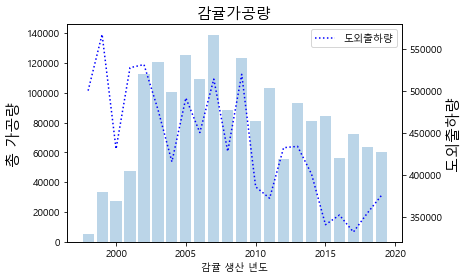

In [140]:
%matplotlib inline

fig, ax0 =plt.subplots()
ax1 = ax0.twinx()
font1 = {'size' :15, 'color':'black'}
font2 = {'size' :15, 'color':'black'}
ax0.set_title("감귤가공량",fontdict=font1)
ax0.bar(graph1_x, graph1_y, alpha=.3)
ax0.set_ylabel("총 가공량",fontdict=font2)
ax0.grid(False)

ax1.plot(graph1_x,graph1_z,'b:')
ax1.set_ylabel("도외출하량",fontdict=font2)
ax1.grid(False)


ax0.set_xlabel("감귤 생산 년도")
plt.legend(['도외출하량'])

In [48]:
project1 = project.fillna(np.mean(project))
pro1 = project1.iloc[:,9:16]

In [49]:
pro1.corr()

,오렌지가격_1kg,오렌지가공매출_백만원,오렌지가공량_ton,감귤가격_1kg,감귤가공매출_백만원,인구수,감귤가공량_ton
오렌지가격_1kg,1.000000,-0.164296,0.436737,0.433141,-0.089627,0.467092,-0.110938
오렌지가공매출_백만원,-0.164296,1.000000,0.068458,-0.139499,0.691817,-0.261130,0.191820
오렌지가공량_ton,0.436737,0.068458,1.000000,0.681363,0.014618,0.849767,0.181751
감귤가격_1kg,0.433141,-0.139499,0.681363,1.000000,0.152232,0.622053,-0.109082
감귤가공매출_백만원,-0.089627,0.691817,0.014618,0.152232,1.000000,-0.203344,0.073857
인구수,0.467092,-0.261130,0.849767,0.622053,-0.203344,1.000000,0.127736
감귤가공량_ton,-0.110938,0.191820,0.181751,-0.109082,0.073857,0.127736,1.000000


In [97]:
project

,년도,귤도매가격,귤소매가격,오렌지도매가격,오렌지소매가격,생산자물가지수(감귤),소비자물가지수(감귤),1인당 가처분소득,1인당 연간소비량(kg),오렌지가격_1kg,오렌지가공매출_백만원,오렌지가공량_ton,감귤가격_1kg,감귤가공매출_백만원,인구수,감귤가공량_ton,감귤처리량
0,1998,10884.666670,11929.333330,21830.00000,45000.0,95.98,80.644,57194.3727,NaN,2310,NaN,13836.0,1326,NaN,46286503,5012,500000
1,1999,6206.000000,11933.333330,30530.00000,93240.0,113.29,102.156,58382.7420,NaN,3202,NaN,15070.0,1512,NaN,46616677,33142,567041
2,2000,7417.333333,11800.000000,14240.00000,52580.0,58.74,55.410,61964.6448,11.9,1538,188000.0,11375.0,936,NaN,47008111,27468,430617
3,2001,6356.000000,11066.666670,17780.00000,51290.0,90.97,79.033,68150.2896,NaN,1898,NaN,10869.0,1194,NaN,47370164,47445,527326
4,2002,5312.000000,8866.666667,22410.00000,63440.0,84.83,84.325,75338.7816,13.3,2390,NaN,8229.0,1099,NaN,47644736,112359,531081
5,2003,9075.000000,26300.000000,17700.00000,56280.0,57.45,63.620,82105.3168,13.0,1904,NaN,19712.0,900,NaN,47892330,120333,477523
6,2004,12609.000000,27000.000000,18720.00000,58280.0,96.77,85.198,90825.8304,12.0,2006,NaN,24065.0,1337,NaN,48082519,100517,415338
7,2005,12133.000000,16500.000000,16700.00000,63520.0,143.35,106.735,95684.7528,13.1,1814,NaN,25366.0,1795,NaN,48184561,125343,491260
8,2006,13026.000000,31800.000000,18650.00000,63380.0,100.05,84.334,99341.6424,12.7,1998,NaN,26547.0,1426,NaN,48438292,109496,450087
9,2007,7101.000000,13100.000000,23090.00000,70610.0,157.50,109.137,107368.2552,16.0,2445,NaN,24101.0,1582,NaN,48683638,138782,513746


In [101]:
project1 = project.fillna(np.mean(project))
graph1_x1 = np.arange(1998,2020)
graph1_y1 = project1.loc[:,"오렌지가공량_ton"]
graph1_z1 = project1.loc[:,"감귤가공량_ton"]

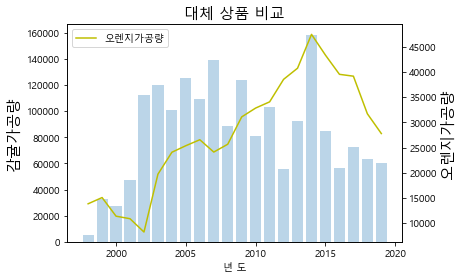

In [116]:
%matplotlib inline

fig, ax0 =plt.subplots()
ax1 = ax0.twinx()
font1 = {'size' :15, 'color':'black'}
font2 = {'size' :15, 'color':'black'}
ax0.set_title("대체 상품 비교",fontdict=font1)
ax0.bar(graph1_x1, graph1_z1, alpha=.3)
ax0.set_ylabel("감귤가공량",fontdict=font2)
ax0.grid(False)

ax1.plot(graph1_x1,graph1_y1,'y-')
ax1.set_ylabel("오렌지가공량",fontdict=font2)
ax1.grid(False)


ax0.set_xlabel("년 도")
plt.legend(['오렌지가공량'])

In [119]:
project1.corr().loc[:,'감귤가공량_ton']

년도               0.186885
 귤도매가격          -0.045533
귤소매가격            0.168501
오렌지도매가격         -0.060041
오렌지소매가격          0.111330
생산자물가지수(감귤)     -0.072081
소비자물가지수(감귤)     -0.032640
1인당 가처분소득        0.172744
1인당 연간소비량(kg)    0.514431
오렌지가격_1kg       -0.068291
오렌지가공매출_백만원      0.207786
오렌지가공량_ton       0.330793
감귤가격_1kg        -0.038335
감귤가공매출_백만원       0.028130
인구수              0.202650
감귤가공량_ton        1.000000
감귤처리량            0.039523
Name: 감귤가공량_ton, dtype: float64

In [120]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager,rc

font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

In [280]:
# 앙상블
from sklearn.ensemble import VotingRegressor,VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

log_clf = LinearRegression()
rnd_clf = RandomForestRegressor()
svm_clf = SVC(C=1.0,
    kernel='rbf',
    degree=3)


voting_clf = VotingRegressor(estimators=[('lr', log_clf),('rf',rnd_clf),('svc',svm_clf)], n_jobs=-1)
#VotingRegressor()
voting_clf.fit(x,y)

VotingRegressor(estimators=[('lr',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False)),
                            ('rf',
                             RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                 

In [281]:
#voting_clf.score(x,y)
# voting_clf.best_params_
print('정확도',round(voting_clf.score(x,y)*100,2),'%')
#voting_clf.get_params()

정확도 87.34 %


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


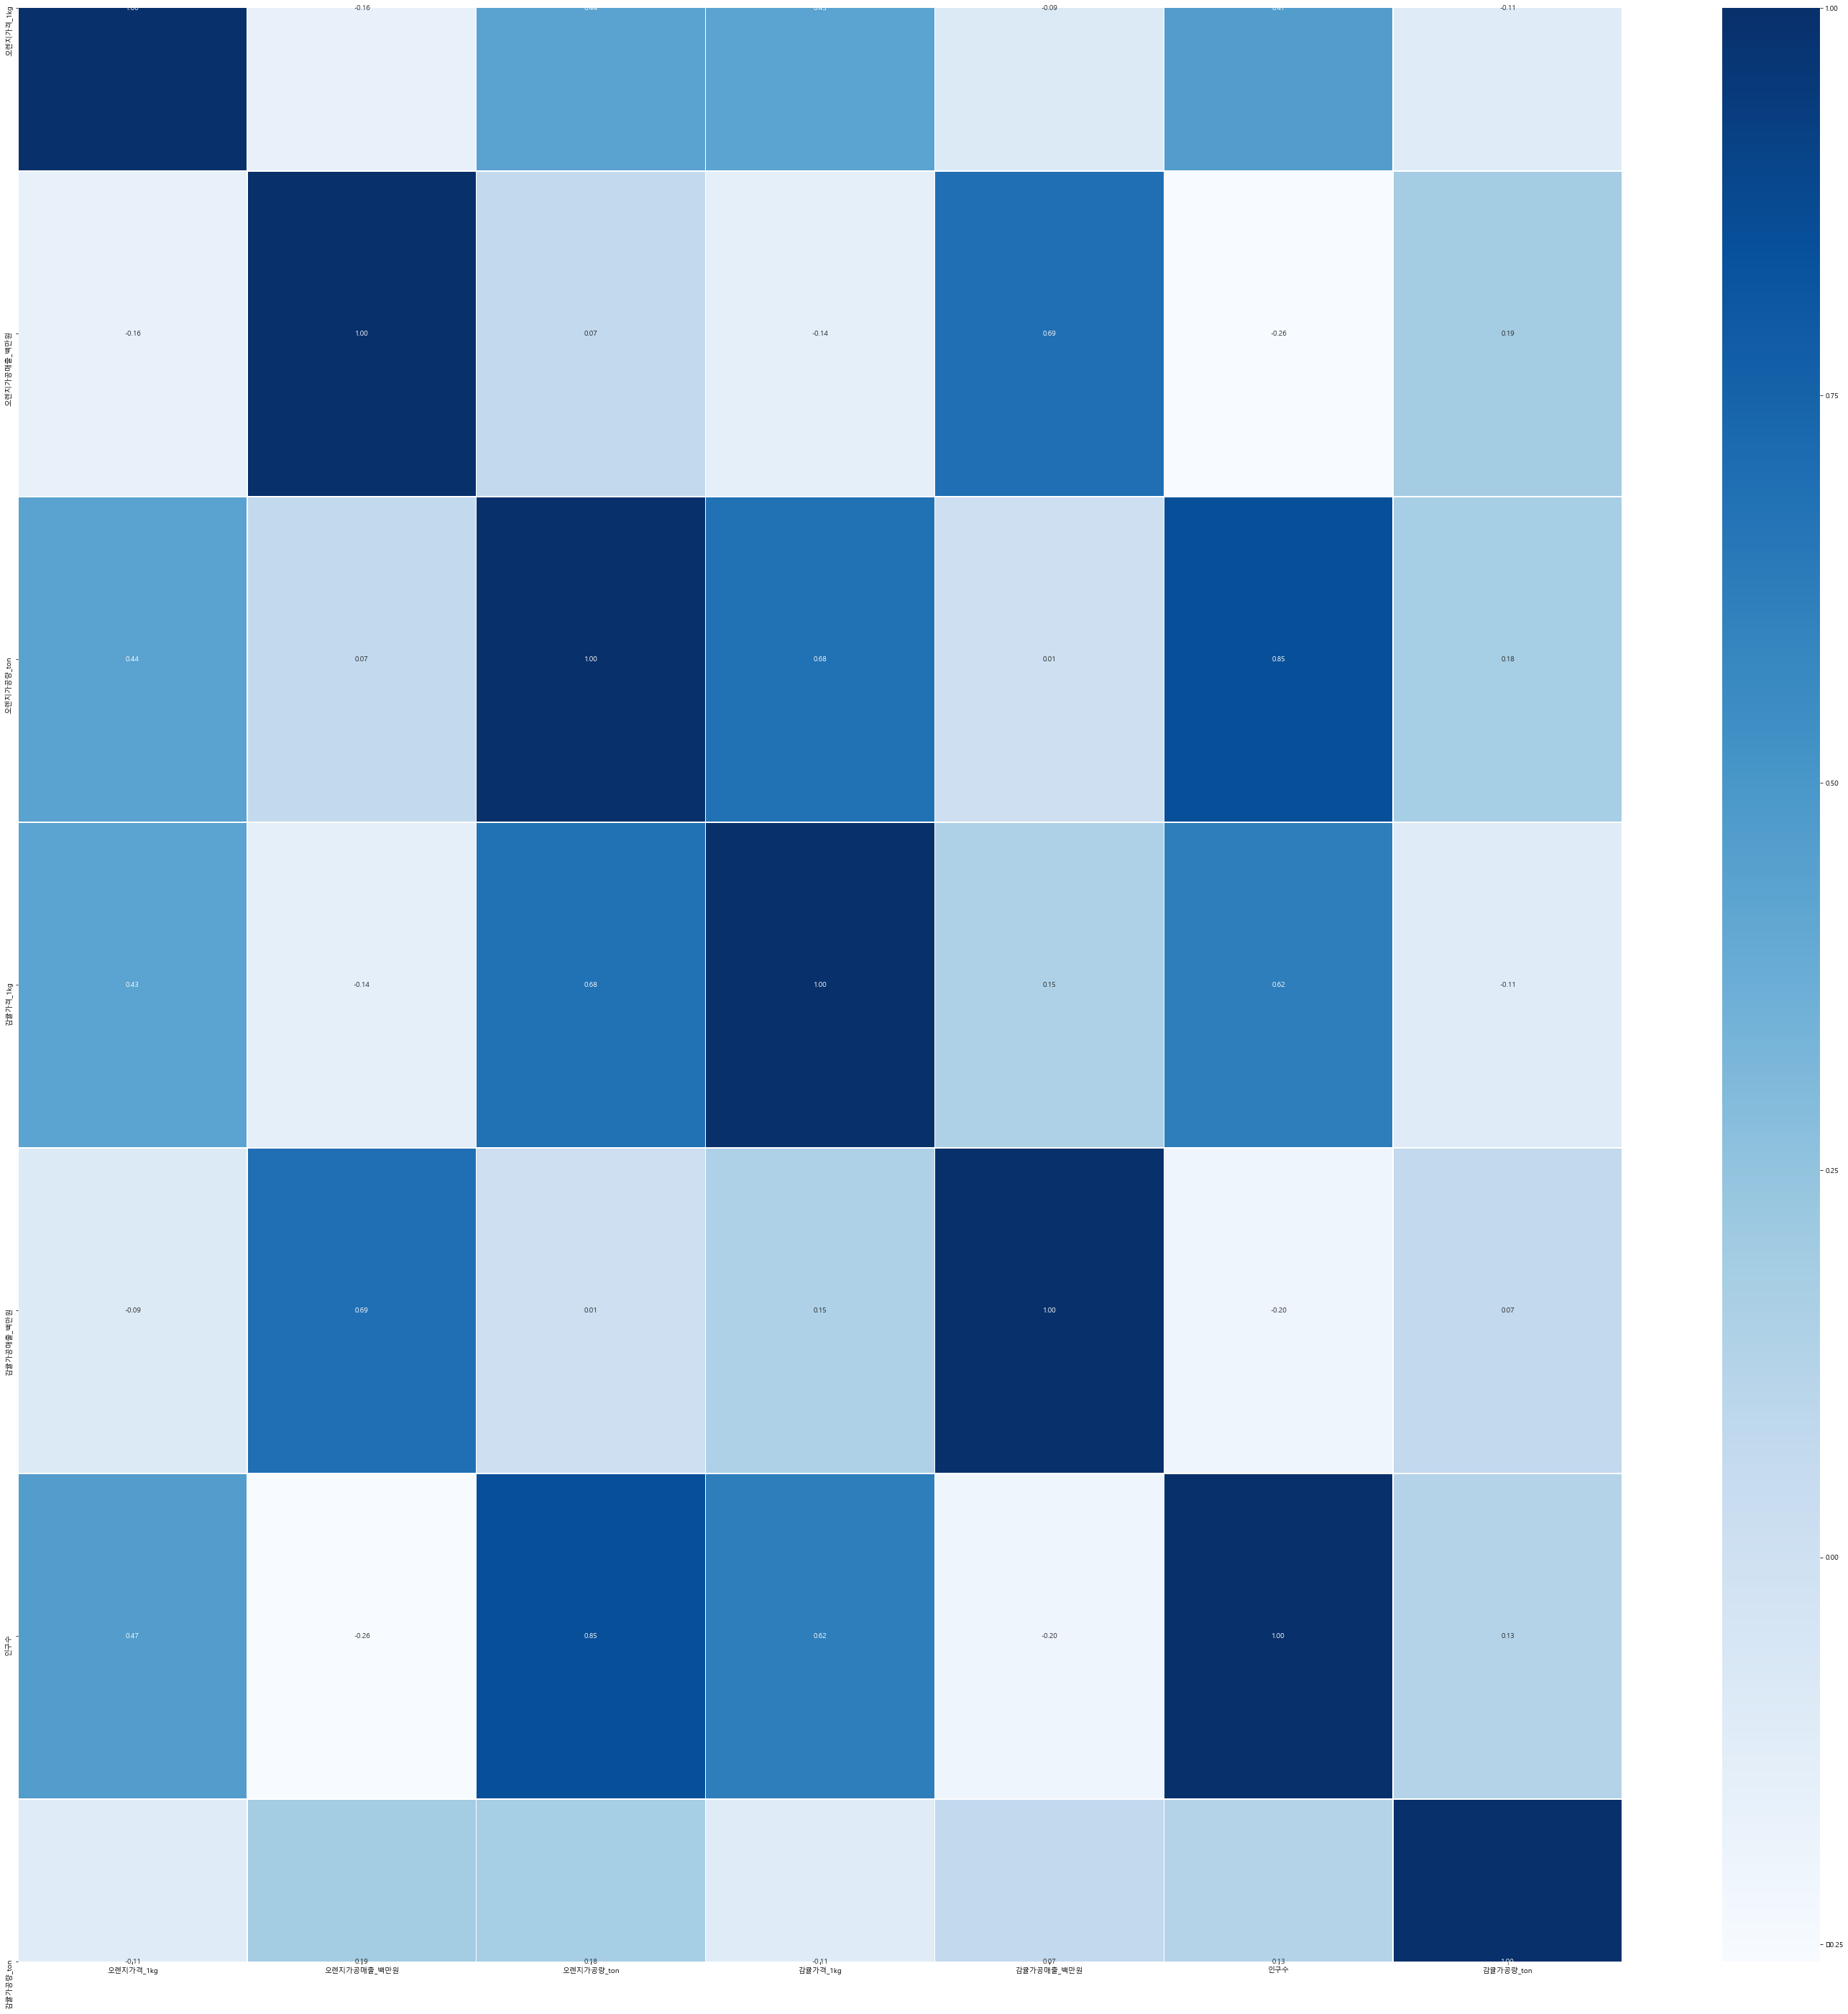

In [50]:
plt.figure(figsize=(50,50))
sns.heatmap(data=pro1.corr(), annot=True,
           fmt = '.2f', linewidths=.5, cmap ='Blues')
plt.show()

In [234]:
# 과소적합, 과대적합 모델 확인 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_val, Y_train, Y_val = train_test_split(x, y, test_size=0.2,random_state = 42,shuffle=True,)

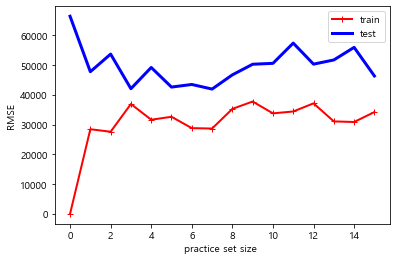

In [239]:
def plot_learning_curves(model, X, Y):

    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], Y_train[:m])
        Y_train_predict = model.predict(X_train[:m])
        Y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(Y_train[:m], Y_train_predict))
        val_errors.append(mean_squared_error(Y_val, Y_val_predict))#이 함수는 말그대로 평균 제곱 오차 회귀 손실이다.
    plt.plot(np.sqrt(train_errors), "r+-", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="test")
    plt.legend(loc='upper right')
    plt.xlabel('practice set size ')
    plt.ylabel('RMSE')
    plt.show()

lin_reg = svm.SVR()
lin_rnd = RandomForestRegressor(n_estimators=3,min_samples_leaf=3)
plot_learning_curves(lin_rnd, x, y)


In [ ]:
from sklearn.datasets import 

In [ ]:
from sklearn.model_selection import GridSearchCV

svr = svm.SVR()
svr_param_grid = { 'kernel' : ['linear','poly','rbf','sigmoid','precomputed','rbf'],
                  'gamma':['scale','auto']}

GSrf= GridSearchCV(svr, svr_param_grid, cv=5, scoring='accuracy', verbose=1)

GSrf.fit(x, y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
